In [1]:
# sklearn has TONS of ML classes, packages, and methods meant to help make Machine Learning Easy!
# train_test_split is a helper function to separate our data into two chunks
# For a general Test Train QA, see https://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test
from sklearn.model_selection import train_test_split

# classification_report and confusion_matrix are helper functions that show you how good your model did on different levels
from sklearn.metrics import classification_report,confusion_matrix

# RandomForest is a specific model that we will use to try and predict if mushrooms are edible or poisonous
# This isn't the only classifier, but it is simple to implement!
from sklearn.ensemble import RandomForestClassifier

# pandas (very commonly seen as pd) is an amazing package that is widely used for managing tabular data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Did you know you can change the default style of plots so that you don't want to rip your eyes out? Try one of these styles!
plt.style.use("ggplot")
#plt.style.use("seaborn")
#plt.style.use("fivethirtyeight")

%matplotlib inline

In [2]:
# a helper function that automatically loads csv data into a DataFrame object.
df = pd.read_csv("mushrooms.csv")

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In any dataset, it is important to know what we are trying to accomplish. Currently, the **CCC** has asked us to **classify** mushrooms, meaning, given information about the mushrooms features, we want to be able to decide if it is edible (**e**) or poisonous **(p)**.

From this table we can see that there are features relating to a mushrooms **cap**, **gill**, **stalk**, etc. Sometimes domain expertise can help you identify important or useless features. For example, a mycologist may tell you that **veil-color** is not at all important in deciding the class of a mushroom, that feature may be useless. Without domain expertise, we are left to fend for ourselves in finding features that actually matter.

All of this data is categorical, for example: a cap is either blue, clear, green, purple, ... This dataset denotes the categories with a single character: 'b' for blue, 'c' for clear, etc. You may not know exactly what each value means, but that's okay! We actually don't need to know what the value represents in order to use it for classification. However, in order to interpret the results we do need to know what the values represent.

In [4]:
# Take a peek at all the possible color values of the caps.
set(df['cap-color'].values)

{'b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'}

We see above that there are 10 different color options, each with its own letter. Machine Learning methods do NOT like this on categorical data, it expects categorical data to be numbered with integers. As such, we need to convert all of our columns into categorical data.

In [5]:
# This helper code is essential for converting categorical data into workable information
for column in df.columns:
    df[column] = df[column].astype("category").cat.codes
set(df['cap-color'].values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Create the train, test split of our data for the modeling process

In [6]:
# train_test_split will segment the data into chunks
train, test = train_test_split(df, train_size=.7, test_size=.3)
len(df), len(train), len(test), len(train)/len(df), len(test)/len(df)

(8124, 5686, 2438, 0.6999015263417036, 0.3000984736582964)

You can see that it split it at the 70-30 ratio we asked it for. A test size of about 20-30% is typical for Machine Learning.

In [7]:
# clf is a common variable name, short for classifier
clf = RandomForestClassifier()

x_train, x_test, or trainX, testX are conventional for Machine Learning data

this is because we are essentially doing regression, where we assume that there is a function $f(x) = y$, where $y \in \{e,p\}$ and we are going to generate a guess: $\hat{f}(x) = \hat{y}$ and we hope that $y = \hat{y}$ for all $x$ values.

We will use our test set to check our predictions by setting $y\_pred = \hat{f}(x\_test)$ and then comparing $y\_pred$ against $y\_test$ to see how accurate we were.

In [8]:
# class is the output we are trying to predict
# for this tutorial, we blindly assume that cap-shape, cap-surface, and cap-color are all we need to predict the class.
y_train = train['class']
our_features = ['cap-shape', 'cap-surface', 'cap-color']
x_train = train[['cap-shape', 'cap-surface', 'cap-color']]

y_test = test['class']
x_test = test[['cap-shape', 'cap-surface', 'cap-color']]

# .fit is a standard method name meaning: fit the model using this test data
# it always requires the training parameters and the training output to work
clf.fit(x_train,y_train)

# .predict will use our fit model to predict the output class
y_predicted = clf.predict(x_test)

# classification_report is a helper function that shows us precise information about our accuracy
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.71      0.77      0.74      1268
          1       0.72      0.66      0.69      1170

avg / total       0.72      0.72      0.72      2438



This may seem like a bunch of numbers, but the classification report is actually not too bad to read. Remember that we classified our mushrooms so instead of seeing **e** and **p** we see **0** and **1** as rows for our data. We have two rows because we have two distinct classes for our mushrooms.

Precision is defined as: The number of times your model correctly guessed this value divided by The total number of times your model guessed this value.

Recall is defined as: The number of times your model correctly guessed this value divided by the total number of times this shows up in y_test.

F1-score is: The average of precision and recall.

Support is: The number of times this value shows up in y_test

An alternative report that also can be helpful is known as the **confusion matrix**, it shows you exactly the number of results that you got correct, and the number you got wrong

In [9]:
print("confusion matrix", confusion_matrix(y_test, y_predicted), sep="\n")

confusion matrix
[[974 294]
 [395 775]]


This can be read as a matrix $A_{nxn}$ where $A_{ij}$ is the number of times our model guessed $j$ as the right answer, when $i$ was the actual answer. Thus the precision and recall can be defined as the diagonal entry divided by the column sum and row sum respectively:

Precision of output i: $A_{ii} \div \sum_{k=1}^{n}A_{ki}$

Recall of output i: $A_{ii} \div \sum_{k=1}^{n}A_{ik}$

In [10]:
A = confusion_matrix(y_test, y_predicted)
# Recovering Precision (The denominator is the column sum)
p0 = A[0,0]/(A[0,0] + A[1,0])
p1 = A[1,1]/(A[1,1] + A[0,1])

# Recovering Recall (The denominator is the row sum)
r0 = A[0,0]/(A[0,0] + A[0,1])
r1 = A[1,1]/(A[1,0] + A[1,1])

f10 = (p0 + r0)/2
f11 = (p1 + r1)/2
p0,p1,r0,r1,(p0+r0)/2, (p1+r1)/2

(0.71146822498173845,
 0.724976613657624,
 0.76813880126182965,
 0.66239316239316237,
 0.73980351312178405,
 0.69368488802539319)

Check that these values match the ones shown in the classification report (with rounding to two digits of course)

In [11]:
y_train = train['class']
our_features = ['cap-shape', 'cap-surface', 'cap-color', 'veil-color']
x_train = train[our_features]

y_test = test['class']
x_test = test[our_features]

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.72      0.78      0.75      1268
          1       0.74      0.67      0.70      1170

avg / total       0.73      0.73      0.73      2438



By adding in **veil-color** we see that our numbers went up slightly, but not by much. Let's look at how much each variable is affecting our output.

# Evaluating our results

One of the coolest parts about classification is figuring out which variables (also called features) are essential and which are nonsense.  Here is some helper code that plots the features with their weight.

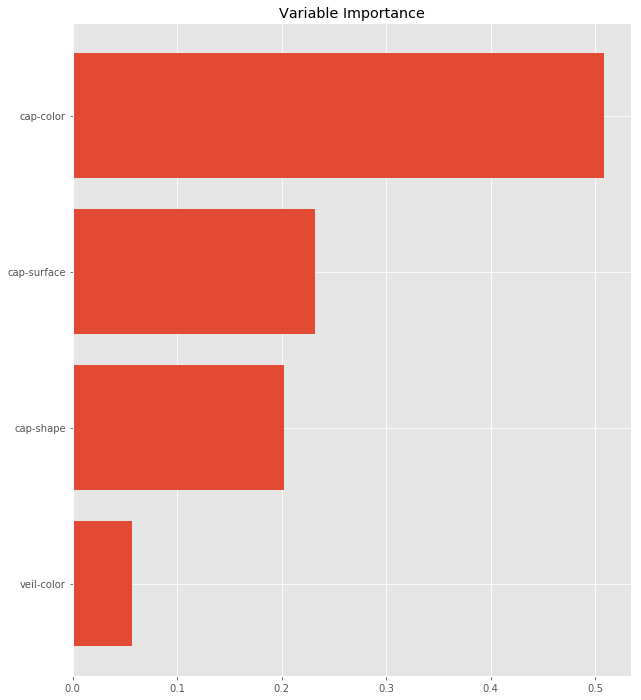

In [12]:
# Find sort them from most important to least important
ind = np.argsort(clf.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(clf.feature_importances_)),clf.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(clf.feature_importances_)),df[our_features].columns[ind])
plt.title("Variable Importance")
plt.show()

# Questions to Consider

1) What should you do if a column only has one value?

2) What happens if you use every feature column in your data?

3) Can you achieve the same accuracy as 2 using less features?

4) Which features were most important? Is it consistent if you run the classifier on a different train/test split?

4) Can you build a function that takes the columns as input and builds a classifier, fits the model, determine the accuracy, and plot the important features?

# Turning it in

Make this code your own! Clean up as much as you want and make it look like a solid report that you would feel happy delivering to the **CCC** to convince them you know what features can be used to classify the edible from the poisonous! Turn your assignment in a pdf format in LearningSuite

# Additional Helper Code

In [ ]:
# Warning: doing inplace=True will permanently remove this column from your data
# To drop a single column from the data
df.drop(column_name, axis=1, inplace=True)
# To drop multiple columns from the data
df.drop([column1, column2, column3], axis=1, inplace=True)

# To select every column in the dataframe except class:
df.drop('class', axis=1)